In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import os
import json

PKM_CSV_FILE = os.path.join(
    os.path.dirname(os.getcwd()), 
    "data",
    "builds",
    "pokemon",
    "pokemon-entries.csv"
)

def update_datasource():
    json_file = os.path.join(
        os.path.dirname(os.getcwd()), 
        "data",
        "builds",
        "pokemon",
        "pokemon-entries.json"
    )
    file = open(json_file)
    raw_data = json.load(file)
    file.close()

    df_data = []

    for pkm in raw_data:
        df_data.append({
            'id': pkm['id'],
            'name': pkm['name'],
            'form_name': pkm['formName'],
            'is_form': pkm['isForm'],
            'generation': pkm['generation'],
            'region': pkm['region'],

            'type1': pkm['type1'],
            'type2': pkm['type2'],
            'color': pkm['color'],

            'base_hp': pkm['baseStats']['hp'],
            'base_atk': pkm['baseStats']['atk'],
            'base_def': pkm['baseStats']['def'],
            'base_spatk': pkm['baseStats']['spa'],
            'base_spdef': pkm['baseStats']['spd'],
            'base_speed': pkm['baseStats']['spe'],
        })

    df = pd.DataFrame(df_data)
    df.set_index('id')
    df.to_csv(PKM_CSV_FILE, encoding='utf-8', index=False)
    
    return df

def load_datasource():
    return pd.read_csv(PKM_CSV_FILE)


In [7]:
# df = update_datasource()
df = load_datasource()
df = df.drop(['name', 'form_name', 'is_form', 'generation', 'region'], axis=1)
# df = df.set_index('id')
df = df.query('base_hp > 0')
df

,id,type1,type2,color,base_hp,base_atk,base_def,base_spatk,base_spdef,base_speed
0,bulbasaur,grass,poison,green,45,49,49,65,65,45
1,ivysaur,grass,poison,green,60,62,63,80,80,60
2,venusaur,grass,poison,green,80,82,83,100,100,80
3,venusaur-f,grass,poison,green,80,82,83,100,100,80
4,venusaur-mega,grass,poison,green,80,100,123,122,120,80
...,...,...,...,...,...,...,...,...,...,...
1404,basculegion-f,water,ghost,blue,120,92,65,100,75,78
1405,sneasler,poison,fighting,gray,80,130,60,40,80,120
1406,overqwil,dark,poison,black,85,115,95,65,65,85
1407,enamorus,fairy,flying,pink,74,115,70,135,80,106


In [85]:
def normalize_data(df):
    data = []
    for index, pkm in df.iterrows():
        data.append({
            'type': pkm['type1'],
            'hp': pkm['base_hp'],
            'attack': pkm['base_atk'],
            'defense': pkm['base_def'],
            'sp_attack': pkm['base_spatk'],
            'sp_defense': pkm['base_spdef'],
            'speed': pkm['base_speed'],
            'color': pkm['color'],
            'id': pkm['id'],
        })
        if pkm['type2'] != None:
            data.append({
                'type': pkm['type2'],
                'hp': pkm['base_hp'],
                'attack': pkm['base_atk'],
                'defense': pkm['base_def'],
                'sp_attack': pkm['base_spatk'],
                'sp_defense': pkm['base_spdef'],
                'speed': pkm['base_speed'],
                'color': pkm['color'],
                'id': pkm['id'],
            })
    return pd.DataFrame(data)

df_normal = normalize_data(df)
df_mean = df_normal.groupby('type').median().reset_index()
df_mean

,type,hp,attack,defense,sp_attack,sp_defense,speed
0,bug,65.0,59.5,55.0,55.0,55.5,68.0
1,dark,70.0,92.0,65.0,70.0,65.0,77.0
2,dragon,80.0,100.0,90.0,96.0,85.0,85.0
3,electric,60.0,70.0,63.0,81.0,70.0,90.0
4,fairy,65.0,60.0,75.0,110.0,121.0,64.0
5,fighting,75.5,105.0,75.0,63.0,70.0,77.5
6,fire,70.0,84.0,65.0,87.5,70.0,78.5
7,flying,75.0,76.0,60.0,85.0,65.0,89.0
8,ghost,60.0,75.0,75.0,85.0,80.0,70.0
9,grass,70.0,75.0,70.0,70.0,75.0,60.0


In [86]:
#df_mean = (df.groupby('type1').mean() + df.groupby('type2').mean()) / 2
#plt.subplots(figsize=(12,8))

# df_mean = df_mean.reset_index()
#plt.title(title)
#df_mean.plot(kind='bar')

#df_mean

<AxesSubplot:title={'center':'Speed'}, xlabel='type', ylabel='speed'>

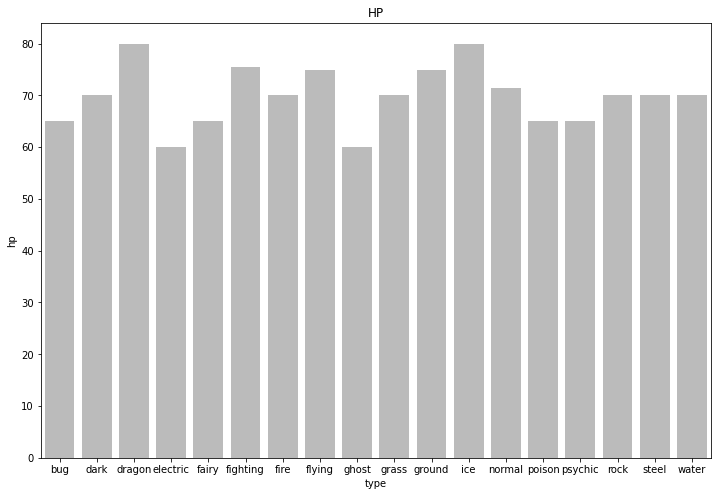

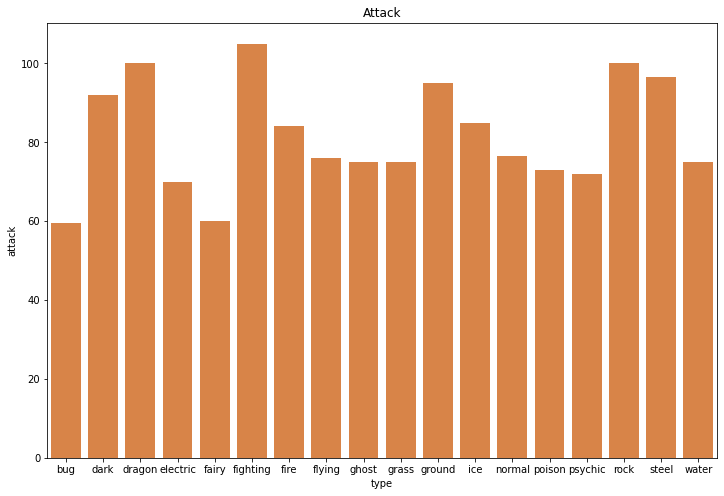

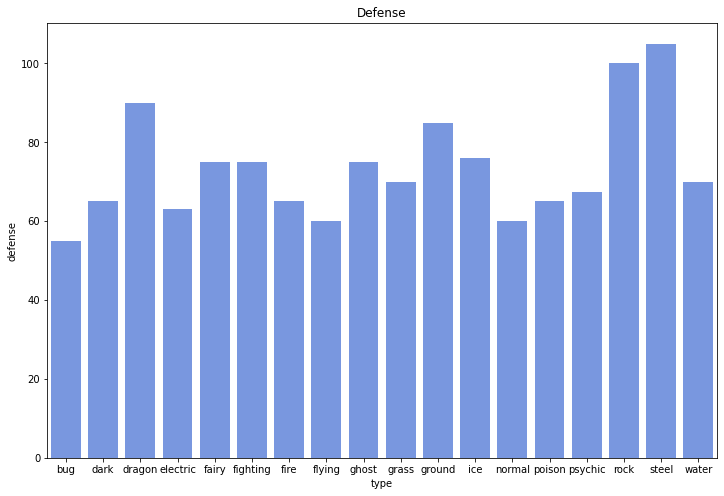

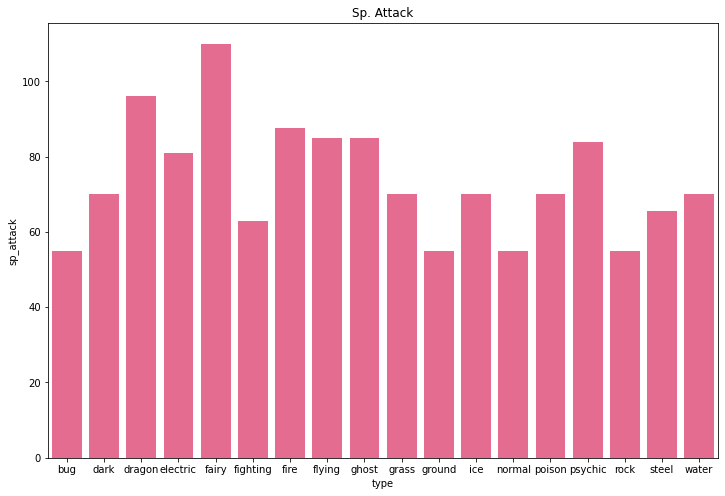

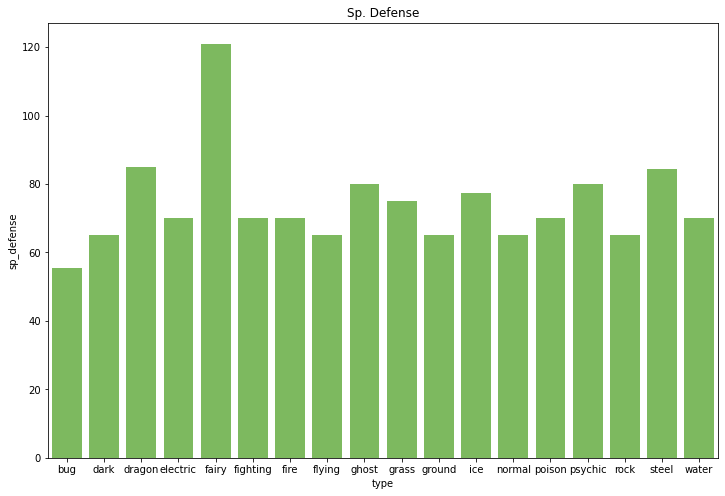

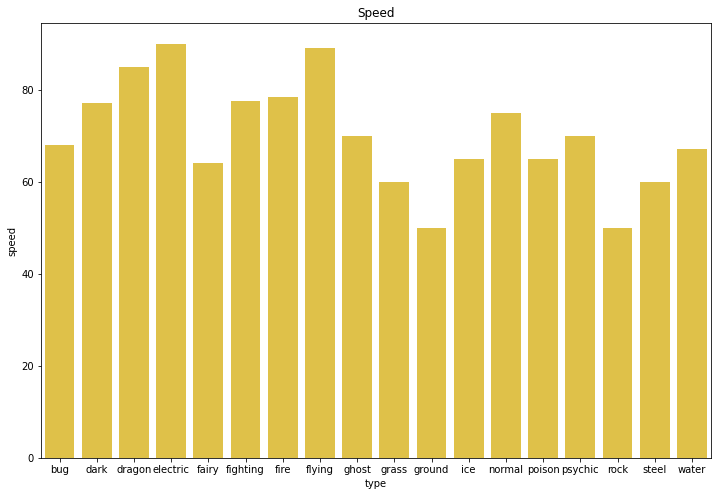

In [87]:

# sns.barplot(data=df_mean, x="type1", y="base_hp", hue='type1')

plt.subplots(figsize=(12,8))
plt.title("HP")
ax = sns.barplot(data=df_mean, x="type", y="hp", color="#bbb")
ax

plt.subplots(figsize=(12,8))
plt.title("Attack")
ax = sns.barplot(data=df_mean, x="type", y="attack", color="#F08030")
ax

plt.subplots(figsize=(12,8))
plt.title("Defense")
ax = sns.barplot(data=df_mean, x="type", y="defense", color="#6890F0")
ax

plt.subplots(figsize=(12,8))
plt.title("Sp. Attack")
ax = sns.barplot(data=df_mean, x="type", y="sp_attack", color="#F85888")
ax

plt.subplots(figsize=(12,8))
plt.title("Sp. Defense")
ax = sns.barplot(data=df_mean, x="type", y="sp_defense", color="#78C850")
ax

plt.subplots(figsize=(12,8))
plt.title("Speed")
ax = sns.barplot(data=df_mean, x="type", y="speed", color="#F8D030")
ax

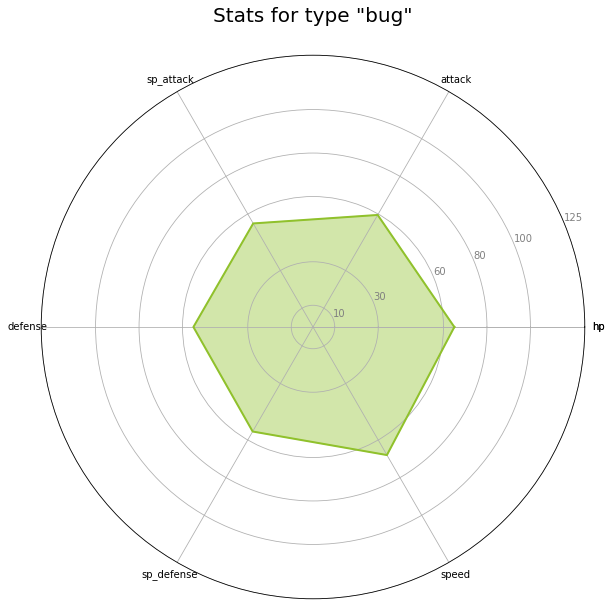

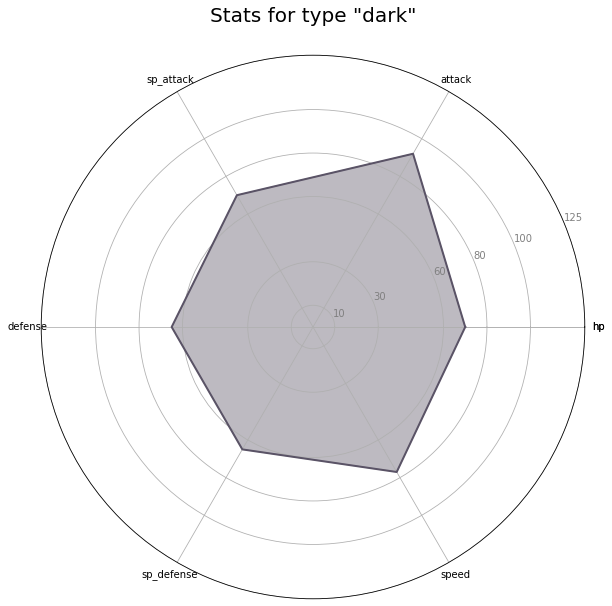

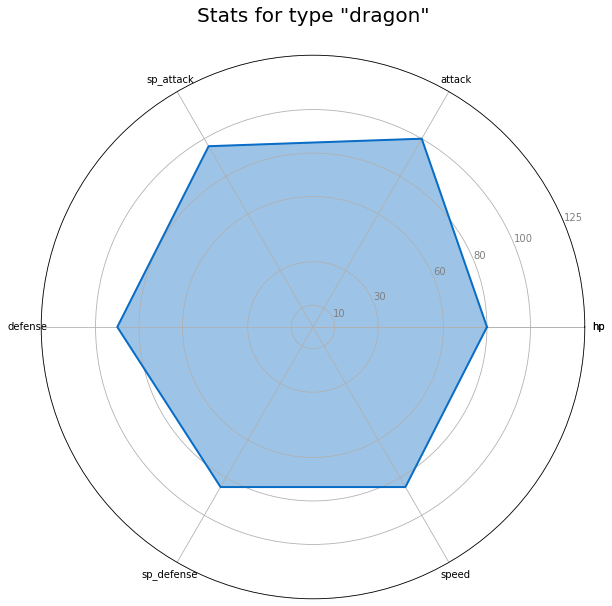

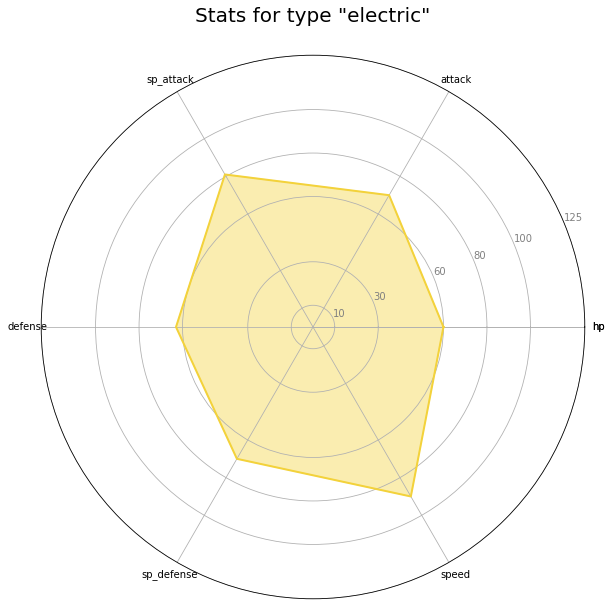

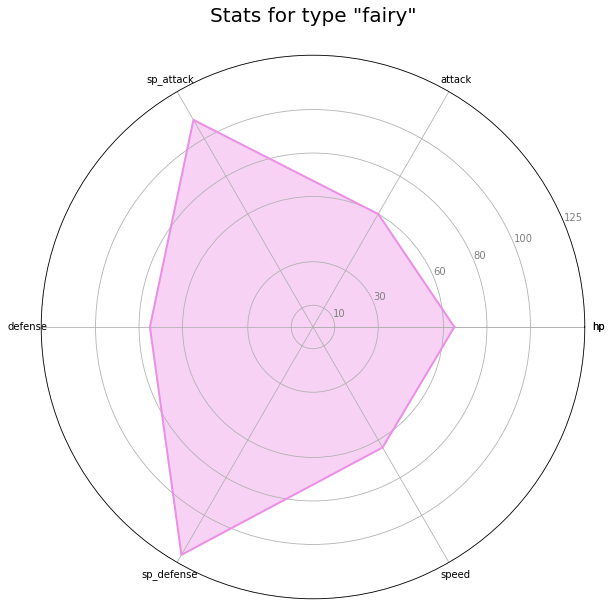

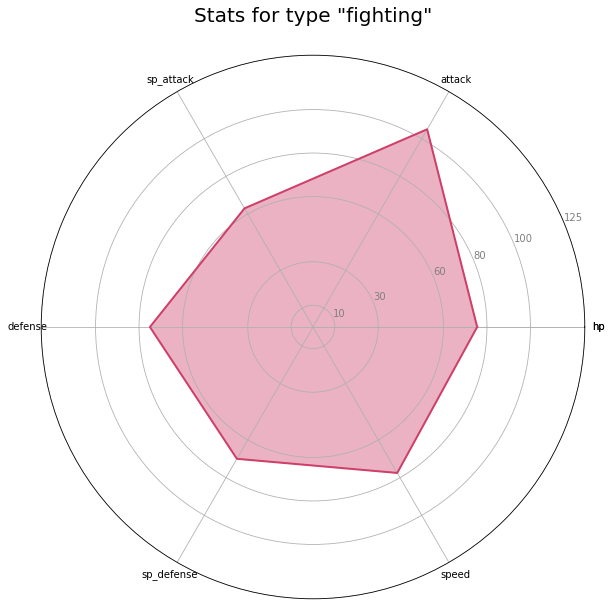

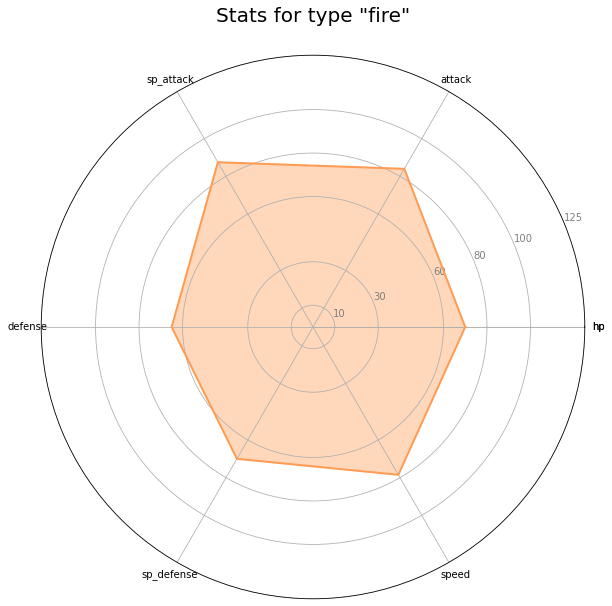

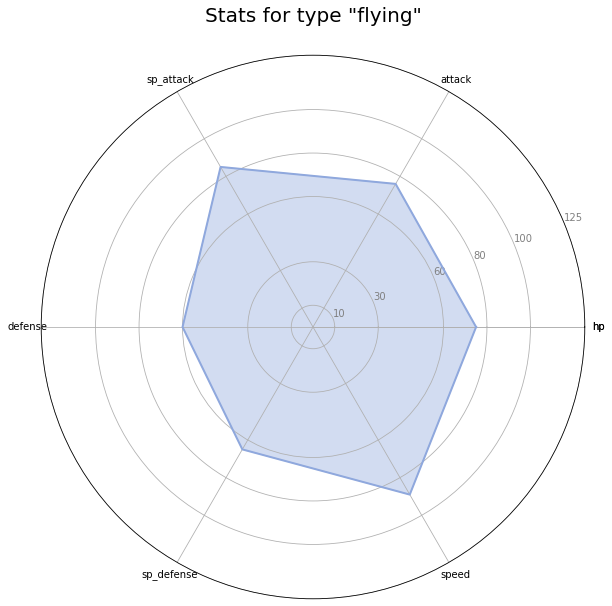

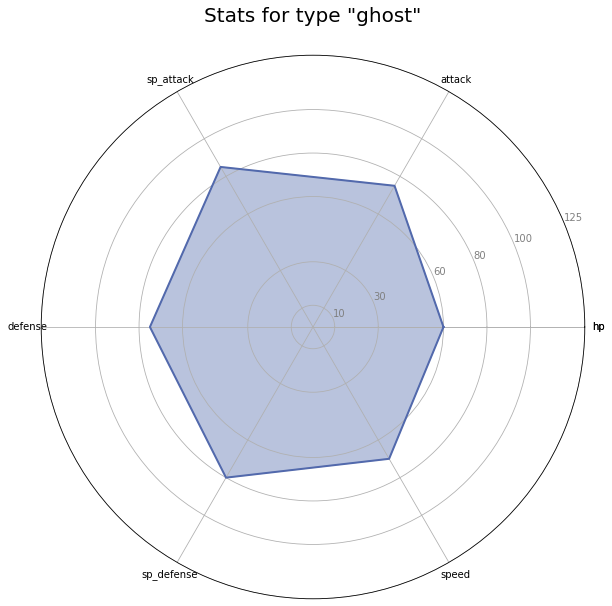

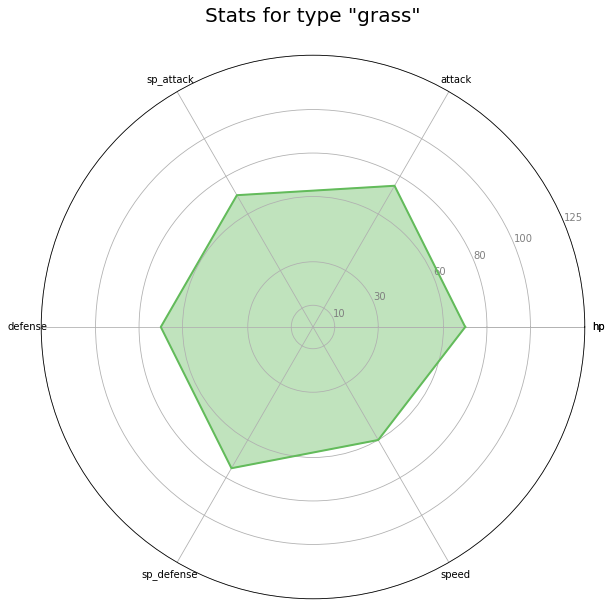

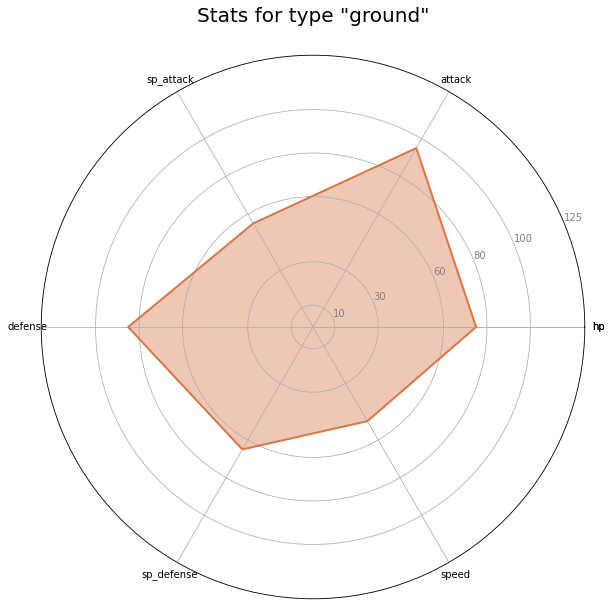

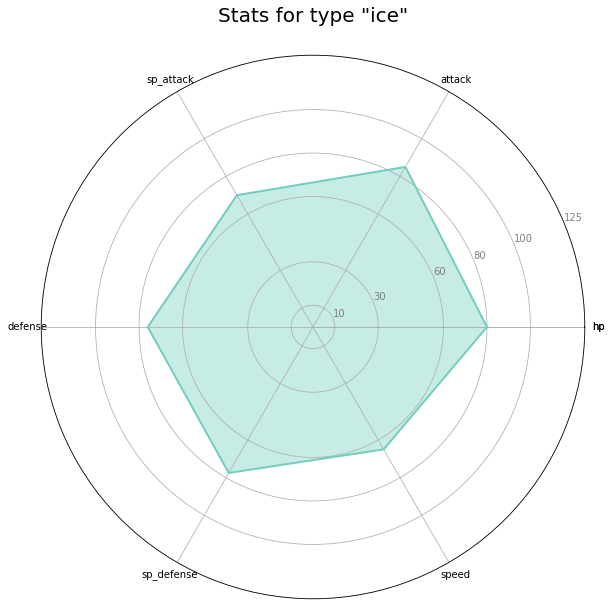

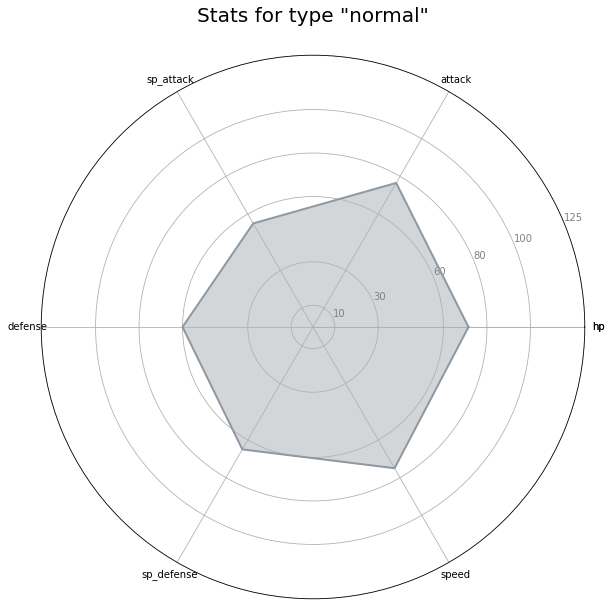

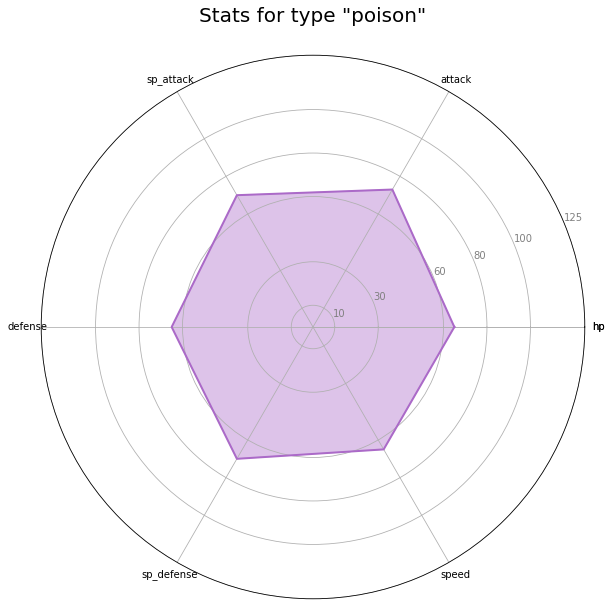

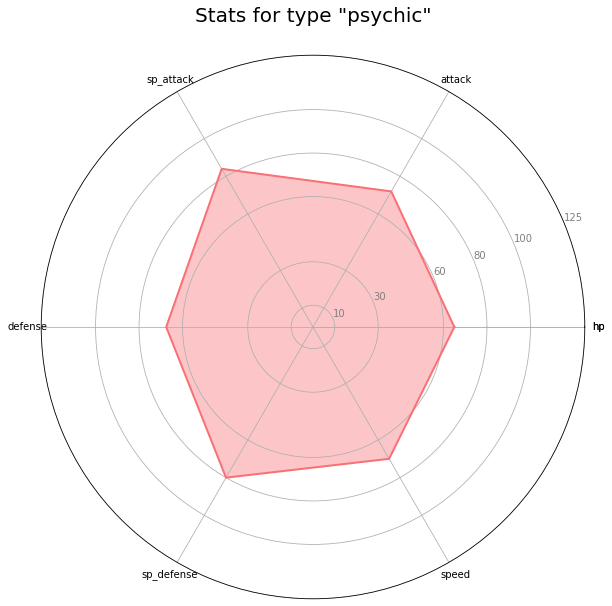

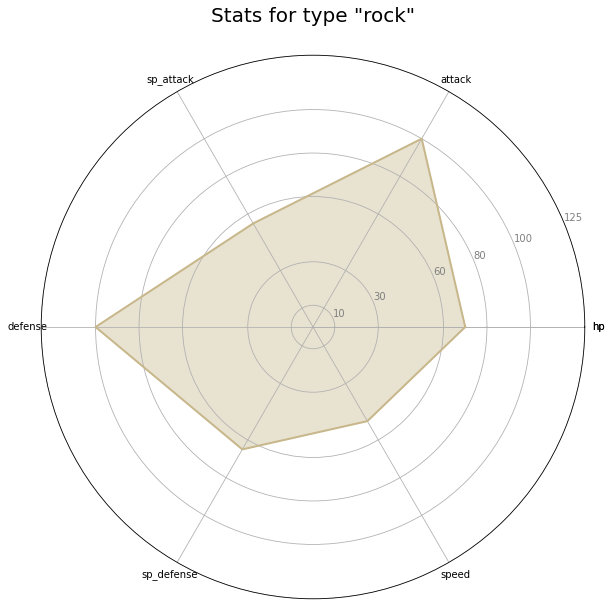

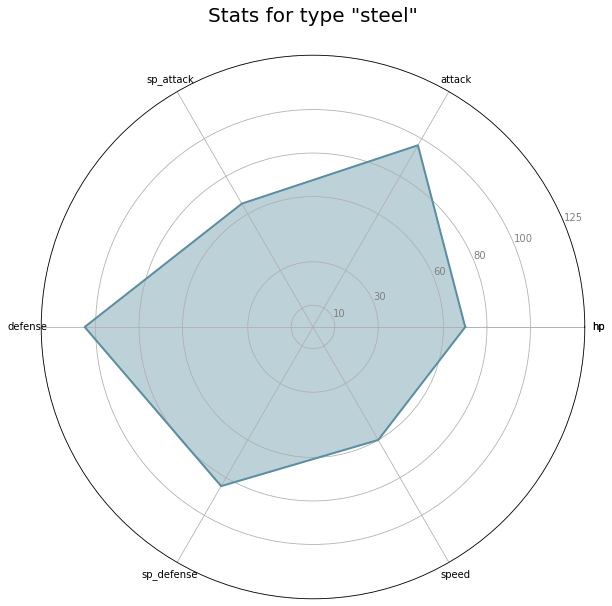

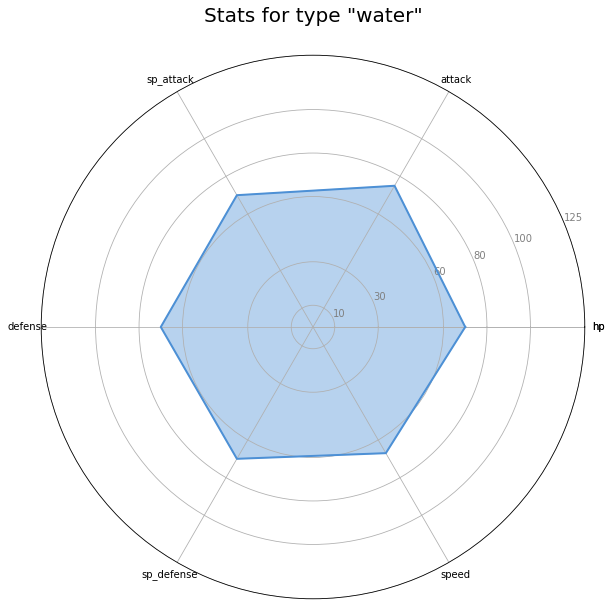

In [101]:
attributes=['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed'] # df_mean.columns.tolist()
types = df_mean['type'].values.tolist()
types_palette = {
    'bug': '#90C12C',
    'dark': '#5A5366',
    'dragon': '#0A6DC5',
    'electric': '#F3D23B',
    'fairy': '#EC8FE6',
    'fighting': '#CE4069',
    'fire': '#FF9C54',
    'flying': '#8FA8DD',
    'ghost': '#5269AC',
    'grass': '#63BB5B',
    'ground': '#D97746',
    'ice': '#74CEC0',
    'normal': '#9099A1',
    'psychic': '#F97176',
    'poison': '#AB6AC8',
    'rock': '#C7B78B',
    'steel': '#5A8EA1',
    'water': '#4D90D5',
    
}

# angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
# angles=np.concatenate((angles,[angles[0]]))

# fig=plt.figure(figsize=(20,10))
# ax=fig.add_subplot(111, polar=True)
# types
# ax.plot(angles, df_mean[attributes].values.tolist(), 'o-', color='darkred', linewidth=1, label='Mewtwo')

def draw_radar_chart(df, attributes, types):
    r_attributes = [*attributes, attributes[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(r_attributes))
    plt.figure(figsize=(18, 18))
    plt.subplot(polar=True)
    
    for pkm_type in types:
        type_data = df.query(f'type=="{pkm_type}"')[attributes].values.tolist()[0]
        type_data = [*type_data, type_data[0]]
        # print(type_data)
        plt.plot(label_loc, type_data, label=f'{pkm_type}')
    
    plt.title('Types and stats comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=r_attributes)
    plt.legend()
    plt.show()
    
def draw_radar_chart_for_type(df, attributes, pkm_type, color):
    r_attributes = [*attributes, attributes[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(r_attributes))
    #plt.figure(figsize=(6, 6))
    
    
    my_dpi=72
    plt.figure(figsize=(720/my_dpi, 720/my_dpi), dpi=my_dpi)
    ax = plt.subplot(polar=True)
    plt.yticks([10,30,60,80,100,125], ["10","30","60","80","100","125"], color="gray", size=10)
    plt.ylim(0,125)
    
    type_data = df.query(f'type=="{pkm_type}"')[attributes].values.tolist()[0]
    type_data = [*type_data, type_data[0]]
    # print(type_data)
    ax.plot(label_loc, type_data, label=f'{pkm_type}', color=color, linewidth=2, linestyle='solid')
    ax.fill(label_loc, type_data, color=color, alpha=0.4)
    
    plt.title(f'Stats for type "{pkm_type}"', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=r_attributes)
    # ax.legend()

for i in range(0, len(types)):
    draw_radar_chart_for_type(df_mean, attributes, types[i], types_palette[types[i]])

plt.show()